In [1]:
# TEST UTFÖRT AV FREDRIK DOMERT ERIKSSON

In [2]:
# Test test

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
os.environ["MKL_NUM_THREADS"] = "1" 

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Laddar upp csv-fil 'customerdata4' 
customer_data = pd.read_csv('customerdata4.csv')

In [5]:
# 1. Vi beskriver datan med .describe
customer_data.describe()


,CustomerID,Age,Annual Income (10kkr),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


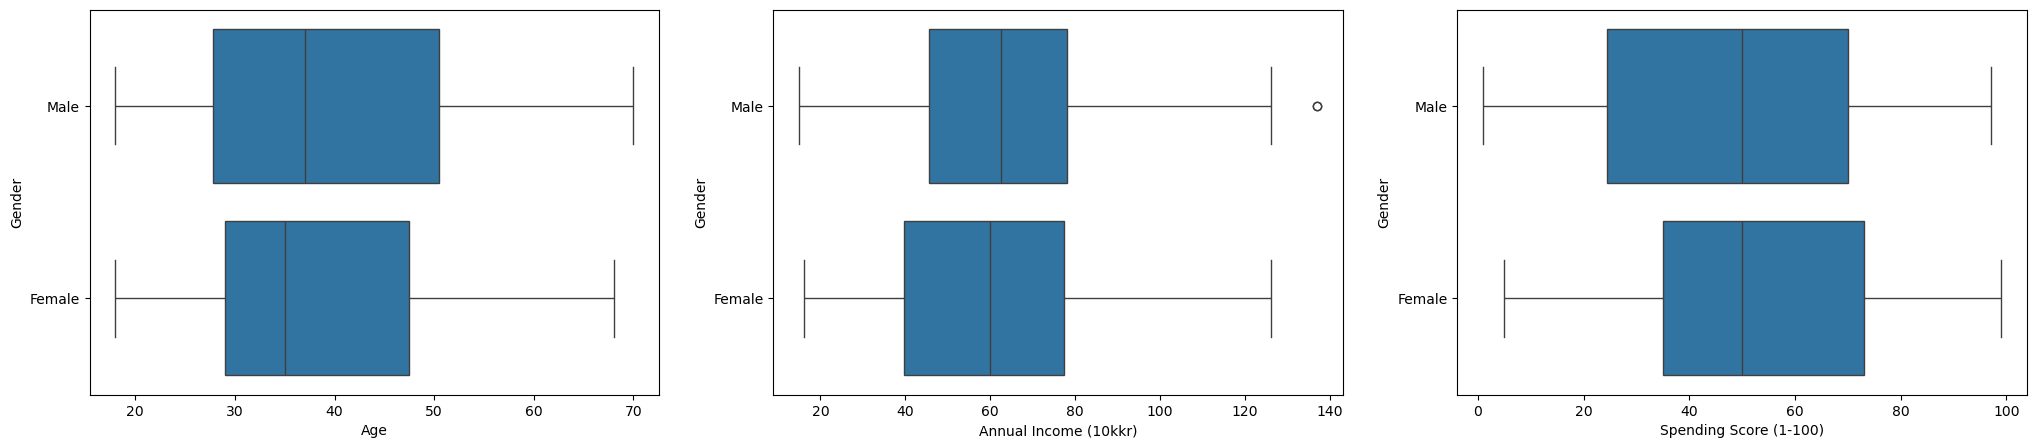

In [6]:
# 2. Boxplots
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
sns.boxplot(data=customer_data, x="Age", y="Gender", ax = axes[0])
sns.boxplot(data=customer_data, x="Annual Income (10kkr)", y="Gender" ,ax = axes[1])
sns.boxplot(data=customer_data, x="Spending Score (1-100)", y="Gender" ,ax = axes[2])
plt.show()

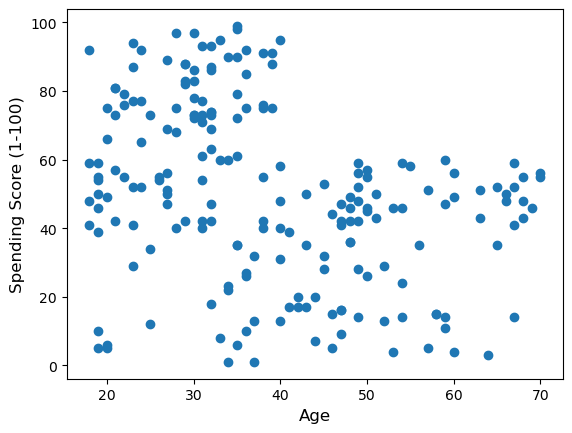

In [7]:
# 3. 

plt.scatter(customer_data.iloc[:,2].values, customer_data.iloc[:,4].values)
plt.xlabel("Age", size=12)
plt.ylabel("Spending Score (1-100)", size=12)
plt.show()

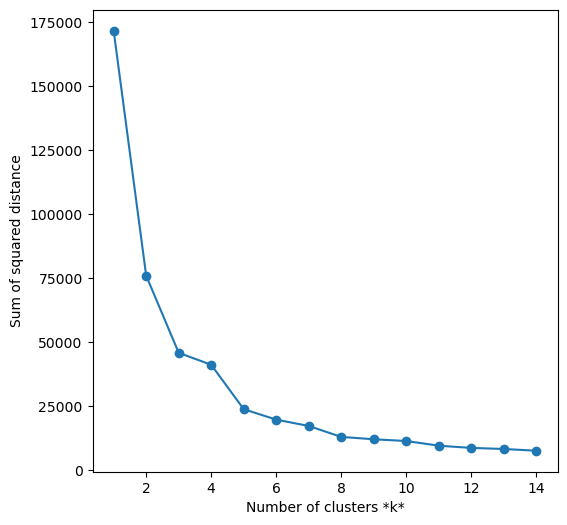

In [8]:
# Elbow
sse = []
x1 = customer_data.iloc[:, 2].values
x2 = customer_data.iloc[:, 4].values
X = np.stack((x1, x2), axis=-1)
data = np.array(list(zip(x1, x2))) # <--- Denna rad definierar 'data' - För K-means

# k_list is the list of range där vi får ut k-värdet.
k_list = list(range(1, 15))

for k in k_list:
    # km_model is the KMeans where we define the model for fitting the data
    km_model = KMeans(n_clusters=k)
    # fitting the data (X is the data set) to km_model
    km_model.fit(X)
    sse.append(km_model.inertia_)

# Plot sse against k and find the value of k where it starts to flatten down and make angle like elbow.
plt.figure(figsize=(6, 6))
plt.plot(k_list, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()

[[43.02173913 14.23913043]
 [29.56451613 80.74193548]
 [43.02173913 47.59782609]]


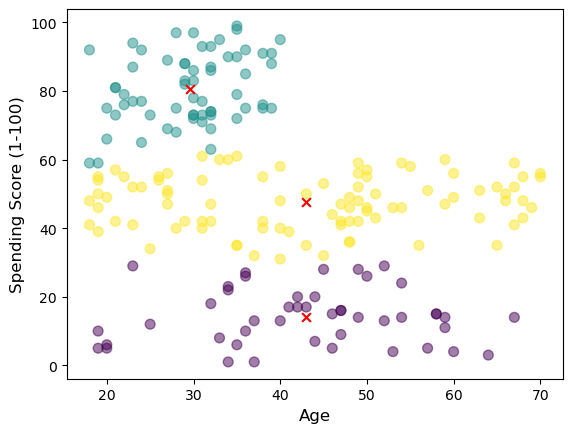

In [9]:
# Motivera k värdet baserat på grafen ovan. Elbox
# Prova med olika k-värden
k = 3

kmeans_data = KMeans(n_clusters = k).fit(data)

centroids = kmeans_data.cluster_centers_
print(centroids)

plt.scatter(data[:,0], data[:,1], c= kmeans_data.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=40,marker='x')
plt.xlabel("Age", size=12)
plt.ylabel("Spending Score (1-100)", size=12)
plt.show()

In [10]:
# 4. Fortsätt

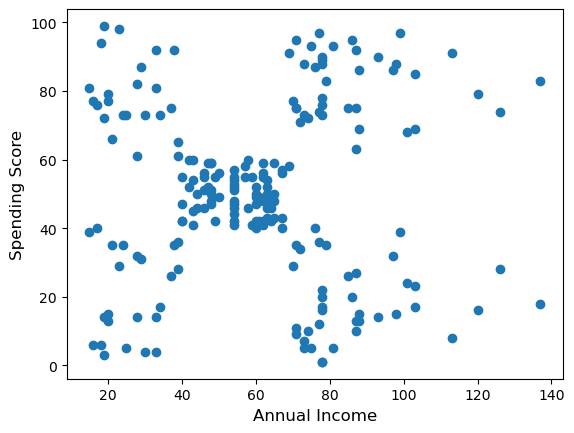

In [11]:
# Scatter plot
plt.scatter(customer_data.iloc[:,3].values, customer_data.iloc[:,4].values)
plt.xlabel("Annual Income", size=12)
plt.ylabel("Spending Score", size=12)
plt.show()

In [12]:
df = pd.read_csv('customerdata4.csv')
X = df[['Annual Income (10kkr)', 'Spending Score (1-100)']].values

sse = [] 
k_range = range(1, 11)

for i in k_range:
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        random_state=42,
        n_init='auto'
    )
    kmeans.fit(X) 
    sse.append(kmeans.inertia_)

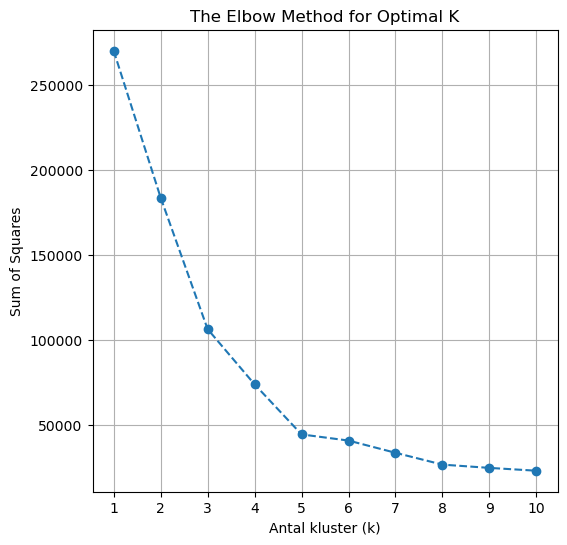

In [16]:
#Vi kan se att 5 är det rätta antal kluster. 

plt.figure(figsize=(6, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('The Elbow Method for Optimal K')
plt.xlabel('Antal kluster (k)')
plt.ylabel('Sum of Squares')
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [14]:
# Välj ut de relevanta funktionerna (features)
X = df[['Annual Income (10kkr)', 'Spending Score (1-100)']].values

# Kör K-Means med k=5
optimal_k = 5
kmeans = KMeans(
    n_clusters=optimal_k, 
    init='k-means++', 
    random_state=42, 
    n_init='auto'
)
y_kmeans = kmeans.fit_predict(X)

# Lägg till klusteretiketterna i DataFrame
df['Cluster'] = y_kmeans

# Visualisera klustren

plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

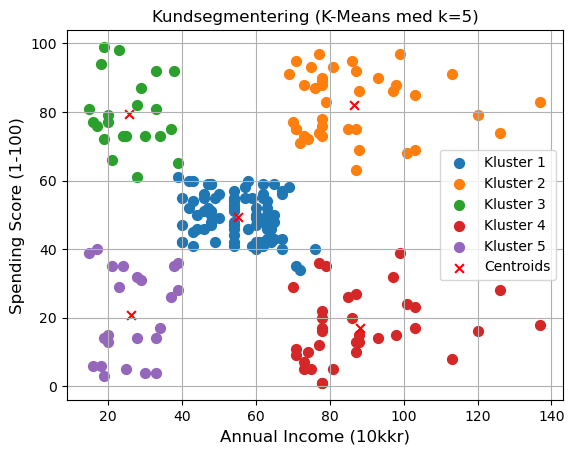

In [17]:
# Loopar igenom de 5 klustren och plottar dem separat
for i in range(optimal_k):
    plt.scatter(
        X[y_kmeans == i, 0],  # Årsinkomst (kolumn 0 i X)
        X[y_kmeans == i, 1],  # Spending Score (kolumn 1 i X)
        s = 50,              # Storlek på punkterna
        label = f'Kluster {i+1}' # Etikett för legend
    )

# Plotta klustrens centroids (mittpunkter) som röda kryss
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s = 40, 
    marker = 'x', 
    c = 'red', 
    label = 'Centroids'
)

plt.title(f'Kundsegmentering (K-Means med k={optimal_k})')
plt.xlabel('Annual Income (10kkr)', size=12)
plt.ylabel('Spending Score (1-100)', size=12)
plt.legend()
plt.grid(True)
plt.show()